In [1]:
from Coulomb import *
from plotting import *

In [2]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, True, False)

In [3]:
vHist5 = test.beam_MEM(17000, 1000, 1E-5, 0.1)

In [16]:
vHist5.shape

(10002, 1000, 3)

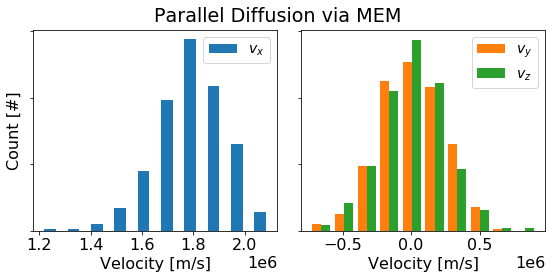

In [114]:
fig= plt.figure()
ax0 = fig.add_subplot(121)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
ax1 = fig.add_subplot(122, sharey = ax0)
plt.suptitle('Parallel Diffusion via MEM')
updateGlobal(16)
first = vHist5[0, :, 1:]
last = vHist5[-1, :, 1:]
fig.set_size_inches(8, 4)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))

ax0.hist(vHist5[-1, :, 0], color = 'C0', rwidth = 0.5)
ax0.legend(['$v_x$'])
ax0.set_ylabel('Count [#]')
ax0.set_xlabel('Velocity [m/s]')

ax1.hist(last, label = ['vy', 'vz'], color = ['C1', 'C2'])
ax1.set_xlabel('Velocity [m/s]')
ax1.legend(['$v_y$', '$v_z$'])
ax1.axes.yaxis.set_ticklabels([])
plt.tight_layout()
plt.subplots_adjust(top = 0.9)

fig.savefig('dist_para_MEM.pdf',bbox_inches = 'tight')


In [9]:
vDiff5 = np.diff(vHist5, n =2,  axis = 0)
time5 = np.linspace(0, 0.2, vDiff5.shape[0])
print(vDiff5.shape)
vVar5 = np.var(vDiff5, axis = 1)
print(vVar5.shape)

(10000, 1000, 3)
(10000, 3)


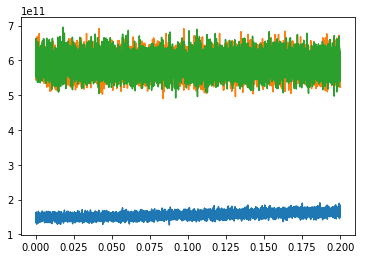

In [10]:
fig = plt.plot(time5, vVar5/(2e-5))

In [13]:
vHist5EM = test.beam_EM(17000, 1000, 1E-5, 0.1)

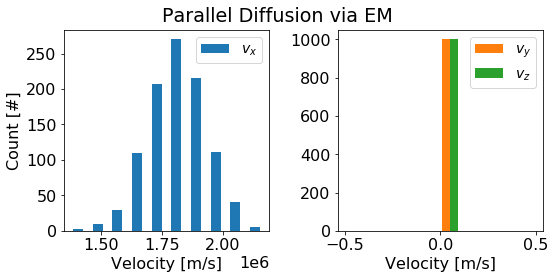

In [116]:
first = vHist5EM[0, :, 1:]
last = vHist5EM[-1, :, 1:]

fig= plt.figure()
ax0 = fig.add_subplot(121)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
ax1 = fig.add_subplot(122)
plt.suptitle('Parallel Diffusion via EM')
updateGlobal(16)

fig.set_size_inches(8, 4)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))

ax0.hist(vHist5EM[-1, :, 0], color = 'C0', rwidth = 0.5)
ax0.legend(['$v_x$'])
ax0.set_ylabel('Count [#]')
ax0.set_xlabel('Velocity [m/s]')

ax1.hist(last, label = ['vy', 'vz'], color = ['C1', 'C2'])
ax1.set_xlabel('Velocity [m/s]')
ax1.legend(['$v_y$', '$v_z$'])
# ax1.axes.yaxis.set_ticklabels([])
plt.tight_layout()
plt.subplots_adjust(top = 0.9)

fig.savefig('dist_para_EM.pdf',bbox_inches = 'tight')